In [26]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import squarify

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

In [72]:
from matplotlib import font_manager, rc
f_path = "C:/Windows/Fonts/NanumBarunGothicBold.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family = font_name)

# 데이터 불러오기

In [32]:
df_ncs = pd.read_excel('ncs_original.xlsx',encoding='cp949')
df_ncs.head()

,대분류,중분류,소분류,세분류,능력단위,능력단위요소
0,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,협력대상국 개발환경 분석하기
1,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,자국협력환경 분석하기
2,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,협력대상국 지원전략 수립하기
3,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 사업기획,협력대상국 개발전략 분석하기
4,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 사업기획,사업타당성 조사하기


# 대분류별 세분류 개수 시각화

In [33]:
df = pd.DataFrame(df_ncs['세분류'].value_counts())
df.head()

,세분류
건강기능식품제조가공,171
일식·복어조리,162
수산식품가공,162
이용,145
네일미용,132


In [76]:
df.reset_index(inplace=True)

In [78]:
df.columns = ['word','count']

In [79]:
df

,word,count
0,건강기능식품제조가공,171
1,일식·복어조리,162
2,수산식품가공,162
3,이용,145
4,네일미용,132
...,...,...
892,보안사고분석대응,22
893,기계마케팅,22
894,자금,21
895,의장생산관리,19


In [80]:
df.to_csv("for_wordcloud.csv",index=False)

In [34]:
ncs_dict = df.to_dict()
ncs_dict

{'세분류': {'건강기능식품제조가공': 171,
  '일식·복어조리': 162,
  '수산식품가공': 162,
  '이용': 145,
  '네일미용': 132,
  '화장품제조': 123,
  '건설기계정비': 119,
  '떡제조': 118,
  '압·사출성형': 113,
  '축산식품가공': 109,
  '목재가공': 108,
  '선재가공': 104,
  '건강운동관리': 103,
  '선체설계': 103,
  '헤어미용': 102,
  '평판인쇄': 100,
  '유제품가공': 100,
  '전기설비운영': 100,
  '직업상담': 99,
  '조경설계': 98,
  '원자력발전기계설비정비': 97,
  '의장품질관리': 96,
  '제강': 95,
  '기장생산': 94,
  '이러닝콘텐츠개발': 94,
  '음료주류가공': 93,
  '자동차섀시정비': 93,
  '단위화훼장식': 93,
  '케이블방송': 92,
  '임산물생산': 91,
  '금속재료제조설비정비': 90,
  '곡류·서류·견과류가공': 89,
  '산림개발': 87,
  '바이오의약품제조': 87,
  '건설안전관리': 86,
  '메이크업': 84,
  '실용음악': 84,
  '전시기획': 83,
  '피부미용': 82,
  '구내통신구축': 82,
  '산림조성': 82,
  '게임콘텐츠제작': 82,
  '펄프·종이제조': 82,
  '조경관리': 81,
  '의지보조기': 80,
  '내선공사': 80,
  '제선': 78,
  '청소년활동': 78,
  '조경시공': 77,
  '산림보호': 76,
  '목공예': 76,
  '소방시설설계·감리': 75,
  '자동차엔진정비': 75,
  '한식조리': 75,
  '청각관리': 75,
  '응용SW엔지니어링': 74,
  '변전설비공사': 74,
  '회의기획': 73,
  '바이오진단제품개발·서비스': 73,
  '석공예': 72,
  '귀금속가공': 72,
  '이벤트기획': 72,
  '상하수도설계': 72,


In [35]:
ncs_dict = ncs_dict['세분류']
ncs_dict

{'건강기능식품제조가공': 171,
 '일식·복어조리': 162,
 '수산식품가공': 162,
 '이용': 145,
 '네일미용': 132,
 '화장품제조': 123,
 '건설기계정비': 119,
 '떡제조': 118,
 '압·사출성형': 113,
 '축산식품가공': 109,
 '목재가공': 108,
 '선재가공': 104,
 '건강운동관리': 103,
 '선체설계': 103,
 '헤어미용': 102,
 '평판인쇄': 100,
 '유제품가공': 100,
 '전기설비운영': 100,
 '직업상담': 99,
 '조경설계': 98,
 '원자력발전기계설비정비': 97,
 '의장품질관리': 96,
 '제강': 95,
 '기장생산': 94,
 '이러닝콘텐츠개발': 94,
 '음료주류가공': 93,
 '자동차섀시정비': 93,
 '단위화훼장식': 93,
 '케이블방송': 92,
 '임산물생산': 91,
 '금속재료제조설비정비': 90,
 '곡류·서류·견과류가공': 89,
 '산림개발': 87,
 '바이오의약품제조': 87,
 '건설안전관리': 86,
 '메이크업': 84,
 '실용음악': 84,
 '전시기획': 83,
 '피부미용': 82,
 '구내통신구축': 82,
 '산림조성': 82,
 '게임콘텐츠제작': 82,
 '펄프·종이제조': 82,
 '조경관리': 81,
 '의지보조기': 80,
 '내선공사': 80,
 '제선': 78,
 '청소년활동': 78,
 '조경시공': 77,
 '산림보호': 76,
 '목공예': 76,
 '소방시설설계·감리': 75,
 '자동차엔진정비': 75,
 '한식조리': 75,
 '청각관리': 75,
 '응용SW엔지니어링': 74,
 '변전설비공사': 74,
 '회의기획': 73,
 '바이오진단제품개발·서비스': 73,
 '석공예': 72,
 '귀금속가공': 72,
 '이벤트기획': 72,
 '상하수도설계': 72,
 '네트워크구축': 72,
 '폐기물관리': 70,
 '자동차 튜닝': 70,
 '수장시공': 70,
 '항공기시스템설계': 

In [61]:
import numpy as np
from PIL import Image
thinking_mask = np.array("think.png")

In [62]:
thinking_mask

array('think.png', dtype='<U9')

TypeError: Image data of dtype <U9 cannot be converted to float

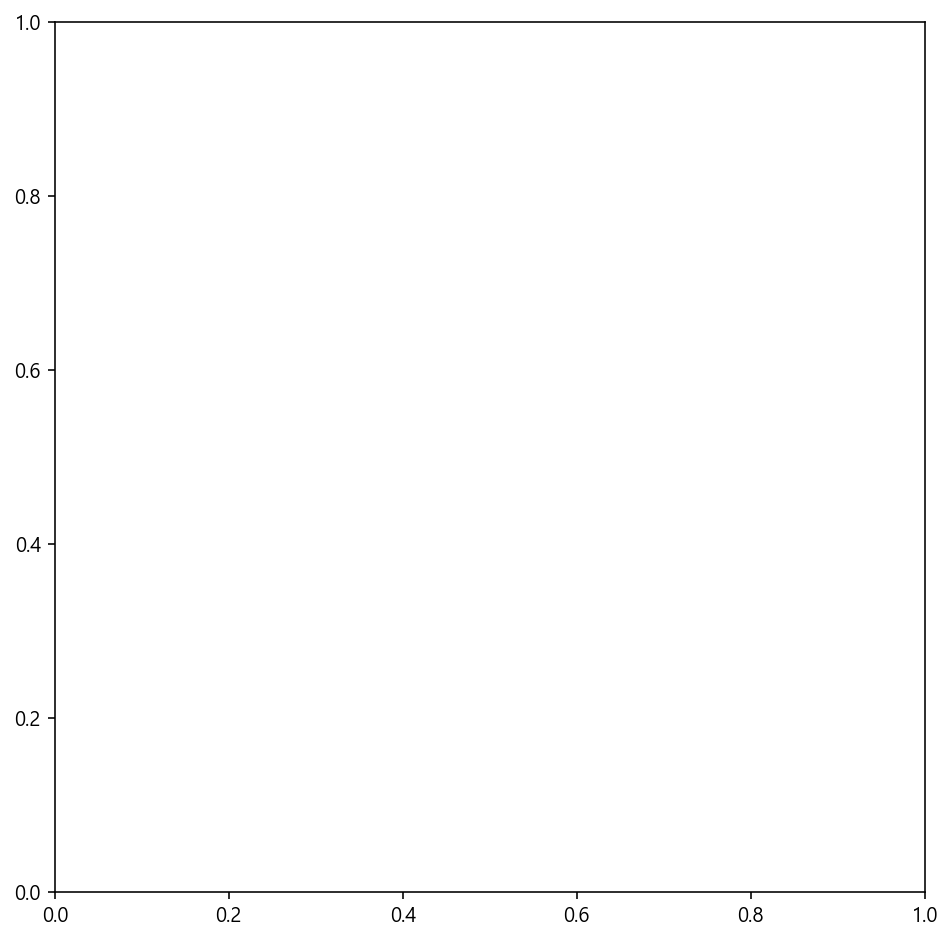

In [64]:
plt.figure(figsize=(8,8))
plt.imshow(thinking_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis("off")
plt.show()

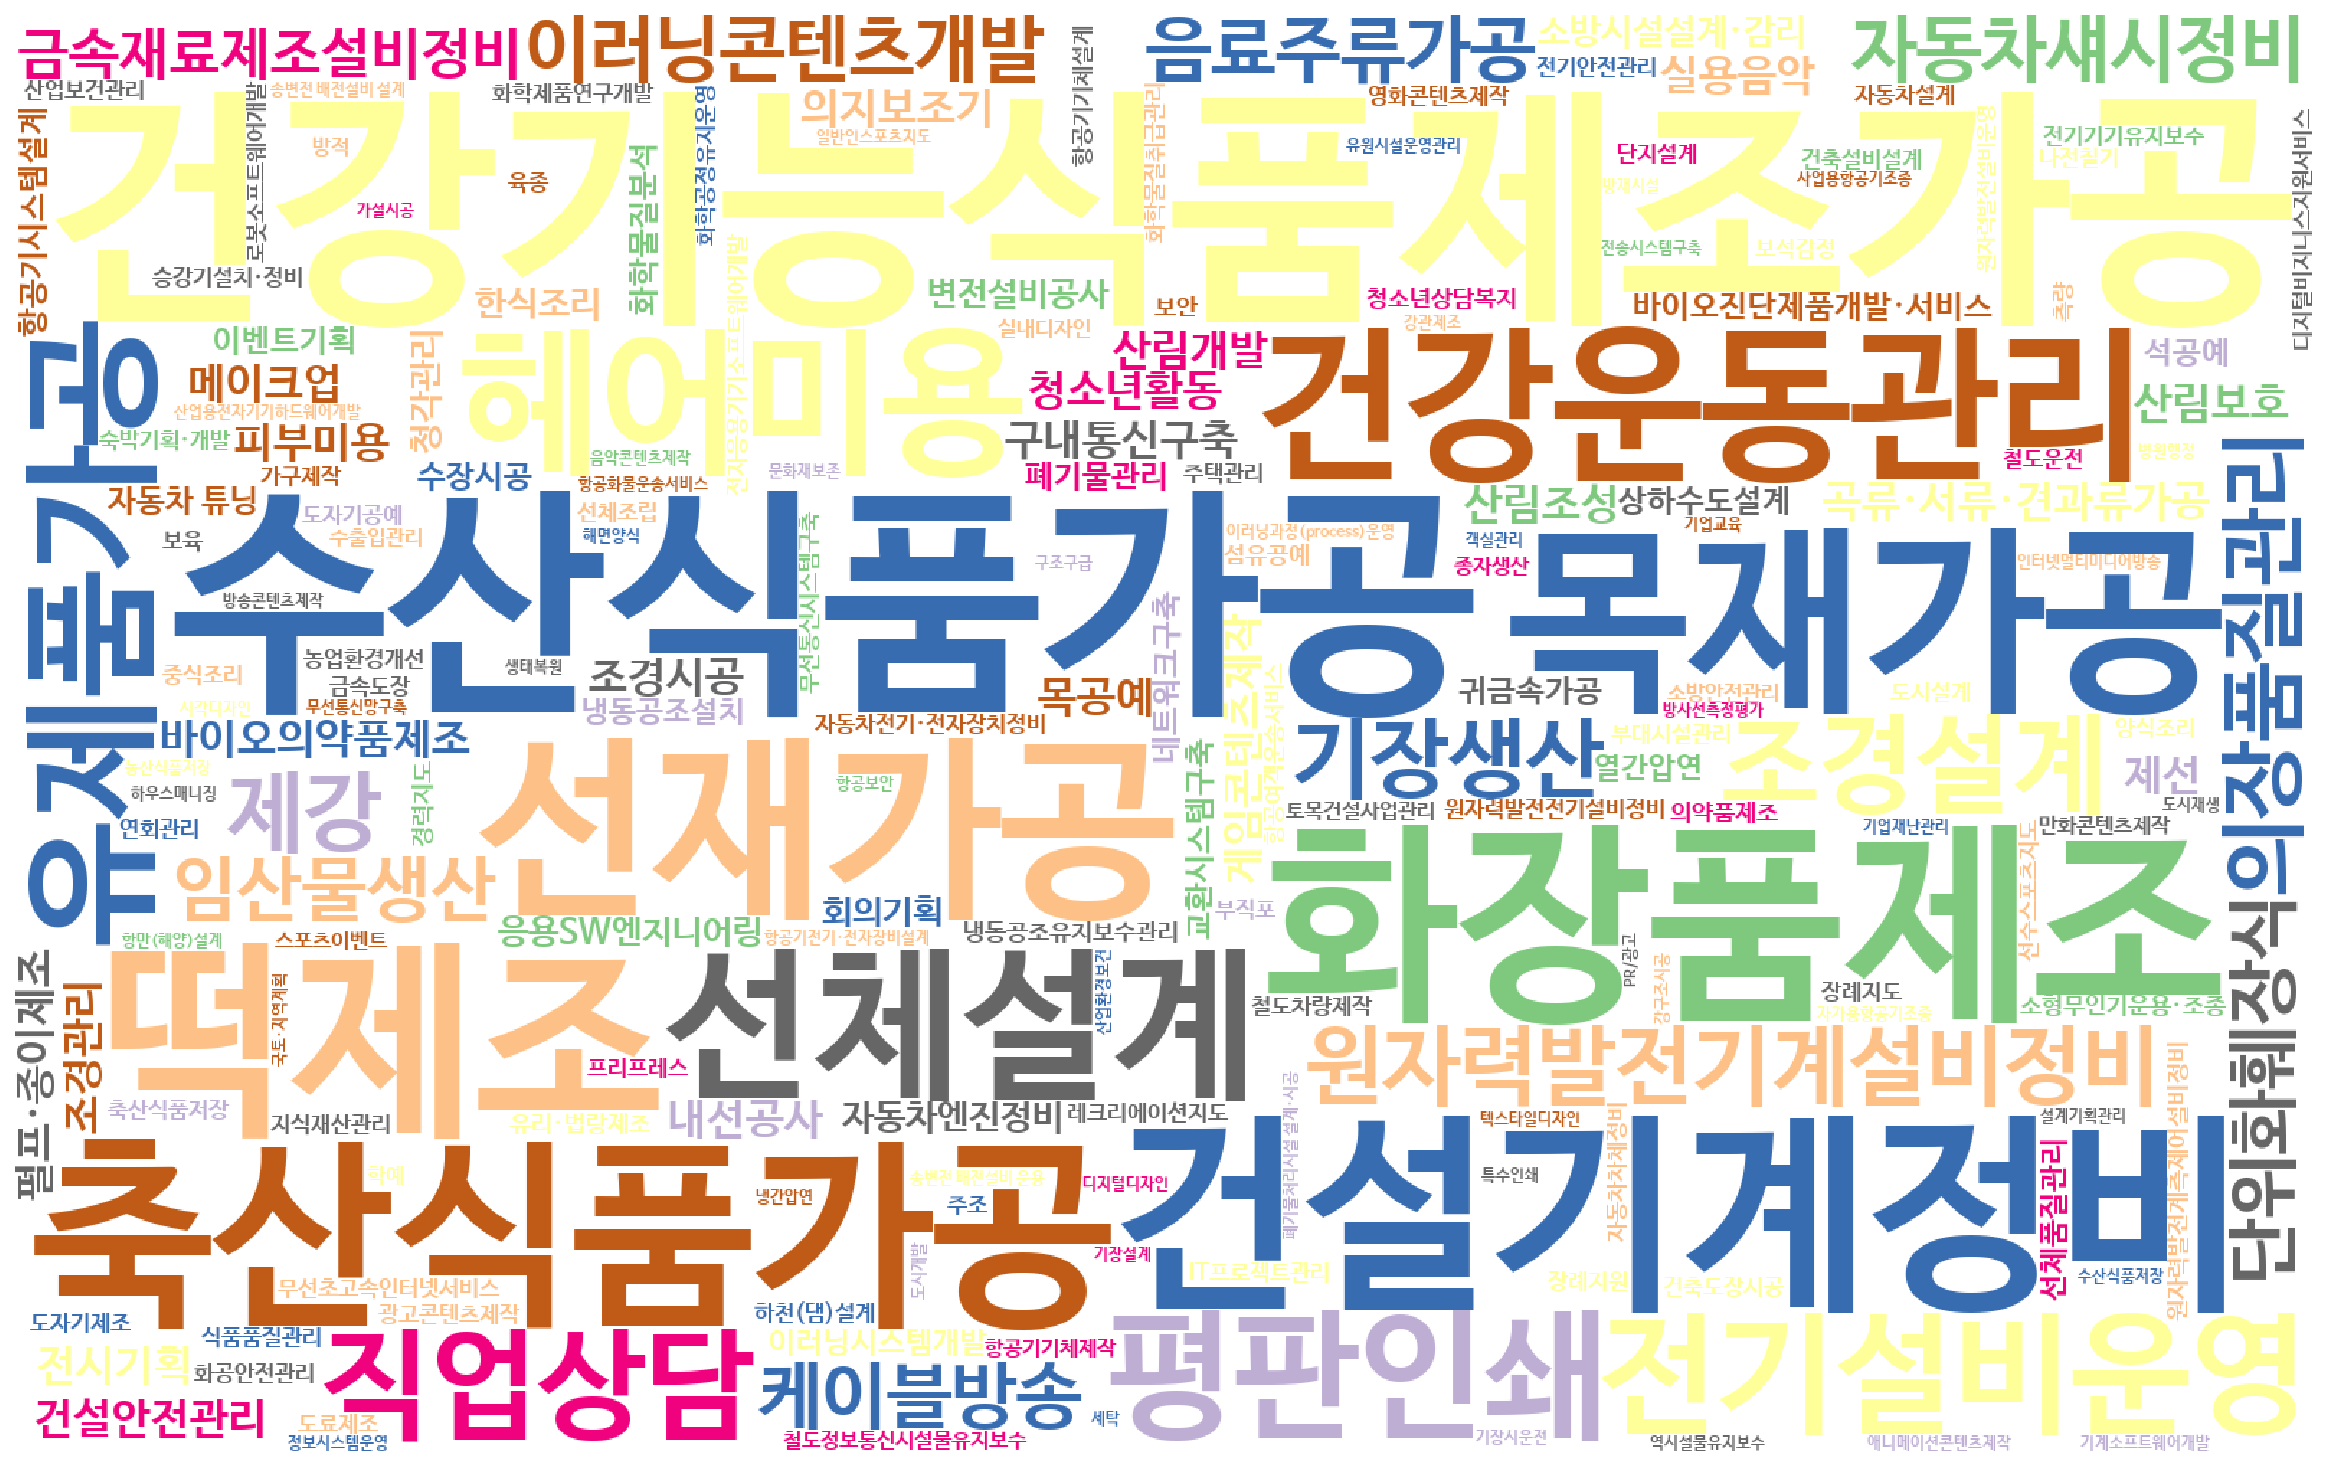

In [74]:
wordcloud = WordCloud(font_path = f_path, background_color='white',colormap = "Accent_r",width=1600, height=1000).generate_from_frequencies(ncs_dict) 
plt.figure( figsize=(20,10))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0)
plt.show()


In [51]:
del(ncs_dict['네일미용'])
del(ncs_dict['일식·복어조리'])

In [117]:
#cmap = matplotlib.get_cmap("Set3")
cmap = matplotlib.cm.get_cmap('Pastel1')    # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df['대분류'].min()
maximum=df['대분류'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df['대분류']]       # 컬러 표현값으로 변경하기
#color_list

## 아래는 color_list 에 들어가는 값입니다
# [(0.403921568627451, 0.0, 0.05098039215686274, 1.0),
# (0.4344329104190696, 0.007381776239907725, 0.054917339484813525, 1.0),
# (0.9344867358708189, 0.2286812764321415, 0.17139561707035755, 1.0),
# (1.0, 0.9607843137254902, 0.9411764705882353, 1.0)]

In [118]:
plt.rcParams['font.size'] = 23

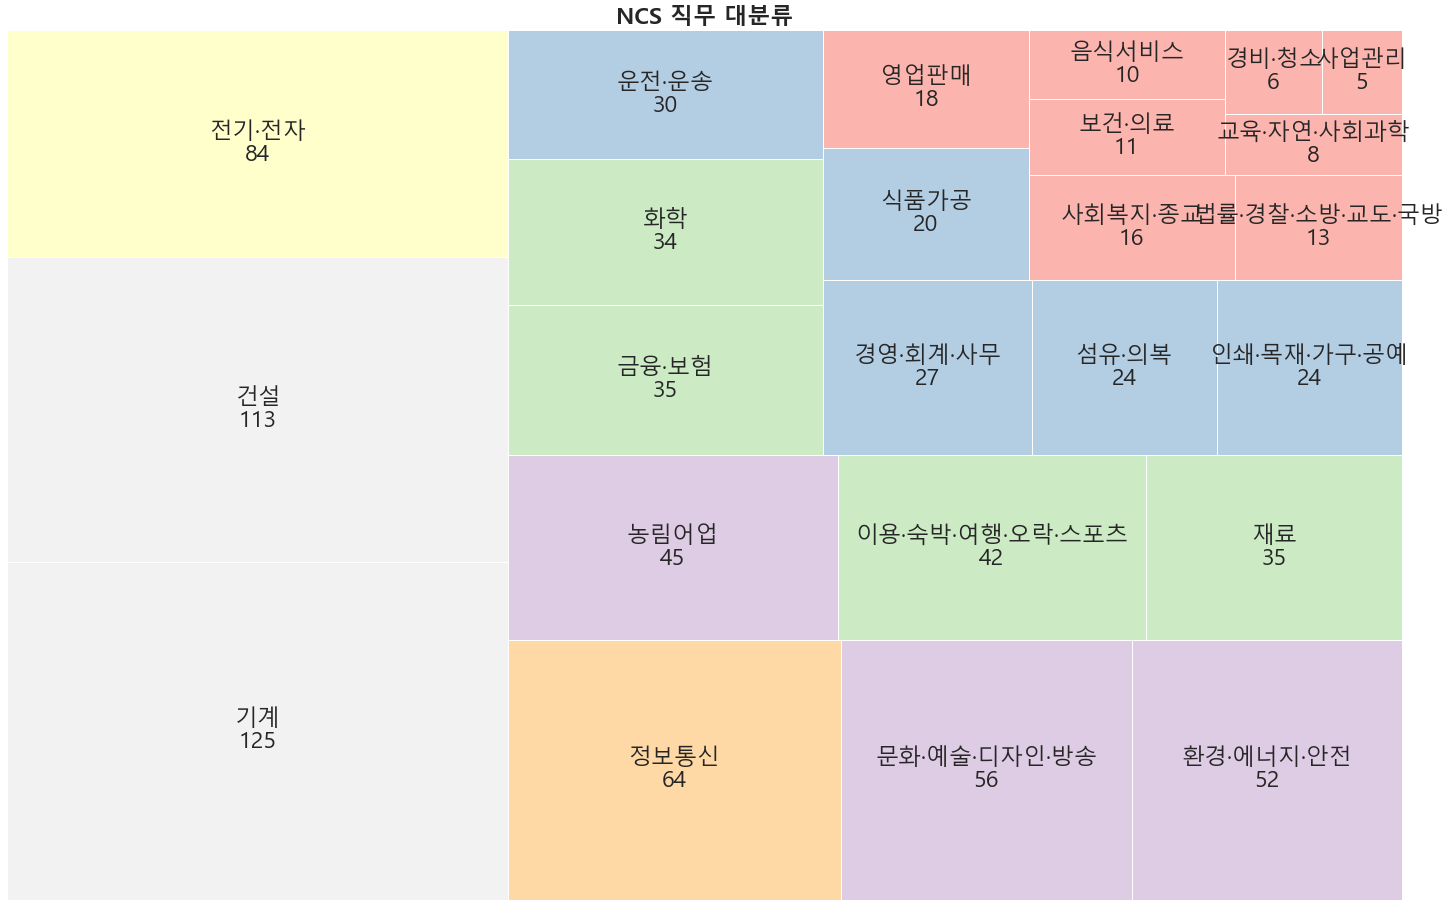

<Figure size 432x288 with 0 Axes>

In [122]:
plt.figure(figsize=(25,16)); plt.axis('off')
squarify.plot(sizes=df['대분류'], label = df.index, value = df['대분류'], color = color_list, )
plt.title("NCS 직무 대분류",fontsize=23,fontweight="bold")
plt.show()
plt.savefig('treemap.png',bbox_inches='tight')